In [4]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the data

df = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank_data.csv")

# Drop duration
#df.drop('duration', axis=1, inplace=True)
df.drop('emp.var.rate', axis = 1, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
numerical = df.select_dtypes(include=['int64', 'float64']).columns

for x in numerical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [6]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays']

for i in x:
    unknown_count = (df[i] == 'unknown').sum()
    print(f"{i}: {df[i].unique()}, Number of 'unknown': {unknown_count}")


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'], Number of 'unknown': 330
marital: ['married' 'single' 'divorced' 'unknown'], Number of 'unknown': 80
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'], Number of 'unknown': 1731
default: ['no' 'unknown' 'yes'], Number of 'unknown': 8597
housing: ['no' 'yes' 'unknown'], Number of 'unknown': 990
loan: ['no' 'yes' 'unknown'], Number of 'unknown': 990
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20], Number of 'unknown': 0


In [7]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in x:
    mode_value = df[column].mode().iloc[0]  # .mode() returns a Series, use .iloc[0] to get the first mode
    unknown_count = (df[column] == 'unknown').sum()
    print(f"{column} - Mode:{mode_value}, Unknowns: {unknown_count}")

job - Mode:admin., Unknowns: 330
marital - Mode:married, Unknowns: 80
education - Mode:university.degree, Unknowns: 1731
default - Mode:no, Unknowns: 8597
housing - Mode:yes, Unknowns: 990
loan - Mode:no, Unknowns: 990


In [7]:
# Dropping records with unknowns in job and marital as they are small in number 

import pandas as pd

# Assuming your DataFrame is named df and the columns with 'unknown' values are 'col1', 'col2', 'col3'
columns_with_unknown = ['job', 'marital']

# Create a boolean mask for rows with 'unknown' values in any of the specified columns
filter = df[columns_with_unknown].apply(lambda col: col != 'unknown').all(axis=1)

# Filter the DataFrame to include only rows where the condition is True
df_filtered = df[filter]


# Assuming df2 is your DataFrame
target_column = 'default'

# Filter out instances with 'yes' as there were only 3 records with default = yes
df_filtered = df_filtered[df_filtered[target_column].isin(['no', 'unknown'])]

# Display the filtered DataFrame
df_filtered 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes


In [8]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df_filtered.copy()
df2['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 
                   'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace= True)
df2['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course',
 'unknown', 'university.degree', 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace= True)
df2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace= True)
df2['loan'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)
df2['housing'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)

# Binary encoding

df2['y'] = df2['y'].map({'no': 0, 'yes': 1})
df2['default'] = df2['default'].map({'no': 1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 1, 'telephone': 0})


df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,1,1,1,2,2,0,5,1,261,1,999,0,1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,2,0,2,2,0,5,1,149,1,999,0,1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,2,1,1,2,0,5,1,226,1,999,0,1,93.994,-36.4,4.857,5191.0,0
3,40,7,1,3,1,2,2,0,5,1,151,1,999,0,1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,2,1,2,1,0,5,1,307,1,999,0,1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,1,1,2,1,11,5,334,1,999,0,1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,2,2,1,11,5,383,1,999,0,1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,1,1,2,1,11,5,189,2,999,0,1,94.767,-50.8,1.028,4963.6,0
41186,44,2,1,5,1,2,2,1,11,5,442,1,999,0,1,94.767,-50.8,1.028,4963.6,1


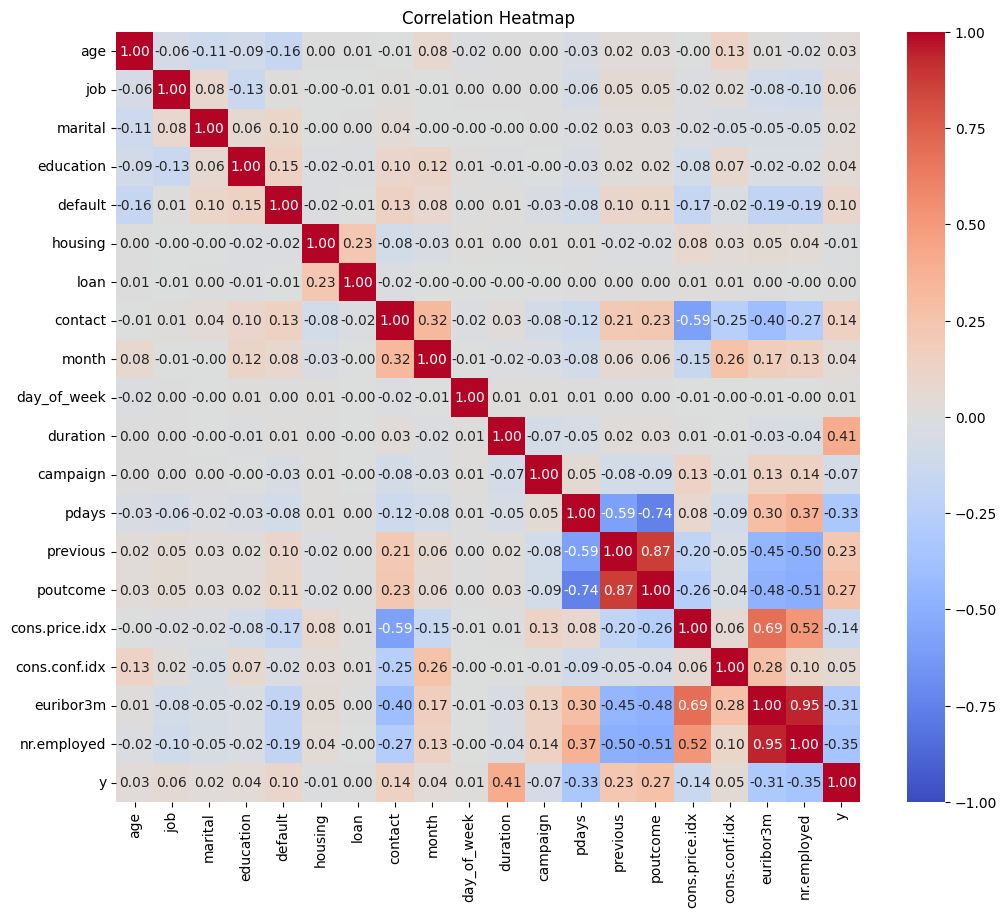

In [9]:
# Correlation analysis

# Q: Should we do Feature selection via correlation analysis?
# Ans: Need to discuss but if we do go ahead with this then
# Check if we need to set a threshold for correlation coeff of say 0.9 and drop columns that have >0.9

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2_standardized is your standardized DataFrame
# You may want to adjust the size of the heatmap based on your needs
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()



In [10]:
# Correlation feature selection

import pandas as pd

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Set the correlation threshold
corr_threshold = 0.9

# Create a mask to identify highly correlated features
mask = (corr_matrix.abs() > corr_threshold) & (corr_matrix.abs() < 1.0)

# Identify pairs of highly correlated features
correlated_features = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        correlated_features.add(col)
        correlated_features.update(correlated_cols)

# Remove one feature from each correlated pair
features_to_drop = list(correlated_features)
df_dropped = df2.drop(columns=features_to_drop)

# Display the filtered DataFrame
print("Original DataFrame shape:", df2.shape)
print("Filtered DataFrame shape:", df_dropped.shape)

for col in df2.columns:
    print(col)

Original DataFrame shape: (40784, 20)
Filtered DataFrame shape: (40784, 18)
age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


In [51]:
# Soft Margin SVM using SMO
# Kernel trick - Radial basis function 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class NonLinearSVM:
    def __init__(self, X, y, C=1.0, gamma=1.0, tol=1e-3, max_iter=100):
        self.X = X
        self.y = y
        self.C = C
        self.gamma = gamma
        self.tol = tol
        self.max_iter = max_iter

    def rbf_kernel(self, X1, X2):
        return np.exp(-self.gamma * np.linalg.norm(X1 - X2) ** 2)

    def fit(self):
        n_samples, n_features = self.X.shape

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.rbf_kernel(self.X[i], self.X[j])

        alpha = np.zeros(n_samples)
        b = 0.0

        for _ in range(self.max_iter):
            for i in range(n_samples):
                # Compute the predicted class label
                f_i = np.sum(alpha * self.y * K[i, :]) + b
                # Compute the error
                E_i = f_i - self.y[i]

                if (self.y[i] * E_i < -self.tol and alpha[i] < self.C) or (self.y[i] * E_i > self.tol and alpha[i] > 0):
                    # Randomly select another index j, different from i
                    j = i
                    while j == i:
                        j = np.random.randint(n_samples)

                    # Compute the predicted class label for j
                    f_j = np.sum(alpha * self.y * K[j, :]) + b
                    # Compute the error for j
                    E_j = f_j - self.y[j]

                    # Save old values of alpha
                    alpha_i_old = alpha[i]
                    alpha_j_old = alpha[j]

                    # Compute L and H, the bounds on new possible alpha values
                    if self.y[i] != self.y[j]:
                        L = max(0, alpha[j] - alpha[i])
                        H = min(self.C, self.C + alpha[j] - alpha[i])
                    else:
                        L = max(0, alpha[i] + alpha[j] - self.C)
                        H = min(self.C, alpha[i] + alpha[j])

                    if L == H:
                        continue

                    # Compute eta, the similarity between the data points i and j
                    eta = 2 * K[i, j] - K[i, i] - K[j, j]

                    if eta >= 0:
                        continue

                    # Compute and clip the new value for alpha_j
                    alpha[j] = alpha[j] - (self.y[j] * (E_i - E_j)) / eta
                    alpha[j] = max(L, min(H, alpha[j]))

                    # Check if alpha_j has changed significantly
                    if np.abs(alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    # Update alpha_i
                    alpha[i] = alpha[i] + self.y[i] * self.y[j] * (alpha_j_old - alpha[j])

                    # Compute the bias terms
                    b1 = b - E_i - self.y[i] * (alpha[i] - alpha_i_old) * K[i, i] - \
                         self.y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                    b2 = b - E_j - self.y[i] * (alpha[i] - alpha_i_old) * K[i, j] - \
                         self.y[j] * (alpha[j] - alpha_j_old) * K[j, j]

                    # Update bias term
                    if 0 < alpha[i] < self.C:
                        b = b1
                    elif 0 < alpha[j] < self.C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2

        # Save the support vectors and corresponding labels
        self.support_vectors = self.X[alpha > 1e-5]
        self.support_labels = self.y[alpha > 1e-5]
        self.alpha = alpha[alpha > 1e-5]
        self.b = b

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for alpha, support_label, support_vector in zip(self.alpha, self.support_labels, self.support_vectors):
                s += alpha * support_label * self.rbf_kernel(X[i], support_vector)
            y_pred[i] = np.sign(s + self.b)
        return y_pred

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        acc = np.mean(y_pred == y)
        return acc

    def run_model(self, X_test, y_test):
        self.fit()
        acc_train = self.accuracy(self.X, self.y)
        acc_test = self.accuracy(X_test, y_test)

        print("Training Accuracy:", round(acc_train * 100, 2), "%")
        print("Test Accuracy:", round(acc_test * 100, 2), "%")

        y_pred_test = self.predict(X_test)
        report = classification_report(y_test, y_pred_test)
        print("Classification Report:")
        print(report)

        balanced_acc = balanced_accuracy_score(y_test, self.predict(X_test))
        print(balanced_acc*100) 

        y_pred_labels = self.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=[-1, 1])
        print("\nConfusion Matrix:")
        print(conf_matrix)

        TN, FP, FN, TP = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

        # Additional metrics using cost analysis
        Cfp, Cfn, Btp, Btn = 1, 10, 20, 5
        TC = (Cfp * FP) + (Cfn * FN)
        TB = (Btp * TP) + (Btn * TN) 
        net_benefit = TB - TC
        print("\nLet's assume a small cost analysis where we have the following")
        print(f"Costs and benefits: Cfp = {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
        print(f"Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {net_benefit}" )


# Assuming df_dropped is your DataFrame
X = df_dropped.drop('y', axis=1).values
y = df_dropped['y'].values
y[y == 0] = -1

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Specify the desired number of samples for each class
desired_samples_per_class = 350

# Select the specified number of samples for each class
X_sampled = []
y_sampled = []

for class_label in np.unique(y_resampled):
    class_indices = np.where(y_resampled == class_label)[0]
    
    # Randomly select samples if there are more than the desired number
    selected_indices = np.random.choice(class_indices, size=min(desired_samples_per_class, len(class_indices)), replace=False)
    
    X_sampled.append(X_resampled[selected_indices])
    y_sampled.append(y_resampled[selected_indices])

X_sampled = np.concatenate(X_sampled, axis=0)
y_sampled = np.concatenate(y_sampled, axis=0)

# Create and run your SVM model
nl_svm = NonLinearSVM(X_sampled, y_sampled, C=0.1, gamma=0.1)
nl_svm.run_model(X_test, y_test)


Training Accuracy: 82.43 %
Test Accuracy: 76.11 %
Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.75      0.85      7238
           1       0.30      0.87      0.45       919

    accuracy                           0.76      8157
   macro avg       0.64      0.81      0.65      8157
weighted avg       0.90      0.76      0.80      8157

80.83645858921946

Confusion Matrix:
[[5409 1829]
 [ 120  799]]

Let's assume a small cost analysis where we have the following
Costs and benefits: Cfp = 1, Cfn = 10, Btp = 20, Btn = 5
Net Benefit: Total Benefit - Total Cost = 43025 - 3029 = 39996


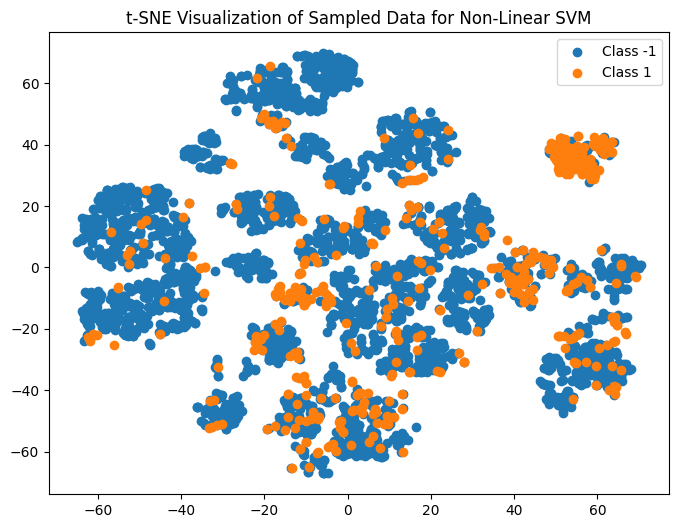

In [50]:
from sklearn.manifold import TSNE

X_train, X_sampled, y_train, y_sampled = train_test_split(X, y, test_size=0.1, random_state=42)

nl_svm = NonLinearSVM(X_sampled, y_sampled, C=0.1, gamma=0.1)
nl_svm.fit()

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
for i in np.unique(y_sampled):
    plt.scatter(X_tsne[y_sampled == i, 0], X_tsne[y_sampled == i, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of Sampled Data for Non-Linear SVM')
plt.legend()
plt.show()
